# Data Visualization - Individual Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.4f}'.format)

In [2]:
df = pd.read_csv("data/PH-HRIR-merged.csv")

<ipython-input-2-24306c0ed5aa>:1: DtypeWarning: Columns (60,70,211,266,330,331,381,445,475,476,477,485,551,570,580,606) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/PH-HRIR-merged.csv")


In [3]:
with open('data/PHHR71FL-data-dictionary.json', 'r') as file:
    hr_col_dict = json.load(file)

with open('data/PHIR71FL-data-dictionary.json', 'r') as file:
    ir_col_dict = json.load(file)
    
for col in df.columns:
    try:
        print(f'{col}: {hr_col_dict[col]}')
    except:
        print(f'{col}: {ir_col_dict[col]}')

CASEID: Case Identification
V000: Country code and phase
V001: Cluster number
V002: Household number
V003: Respondent's line number
V004: Ultimate area unit
V005: Women's individual sample weight (6 decimals)
V006: Month of interview
V007: Year of interview
V008: Date of interview (CMC)
V008A: Date of interview Century Day Code (CDC)
V009: Respondent's month of birth
V010: Respondent's year of birth
V011: Date of birth (CMC)
V012: Respondent's current age
V013: Age in 5-year groups
V014: Completeness of age information
V015: Result of individual interview
V016: Day of interview
V018: Row of month of interview
V019: Length of calendar
V019A: Number of calendar columns
V020: Ever-married sample
V021: Primary sampling unit
V022: Sample strata for sampling errors
V024: Region
V025: Type of place of residence
V027: Number of visits
V028: Interviewer identification
V030: Field supervisor
V034: Line number of husband
V042: Household selected for hemoglobin
V044: Selected for Domestic Violence

**Let's practice creating plots! Try replicating the following images:**

1. Common reasons of not using contraceptive methods from highest to lowest value
<img src='fig/Viz1.png'>

*Hint: figsize=10,6; axis labels fontsize=12; title fontsize=16*

In [4]:
graph1_df = df.groupby('V376').size().sort_values(ascending = False)

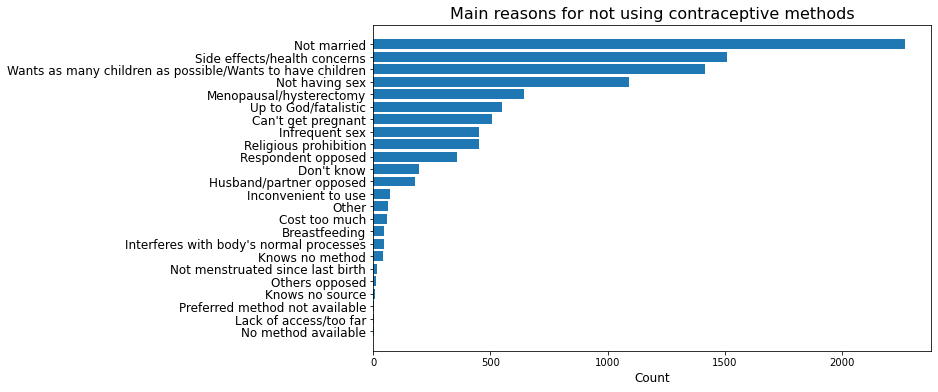

In [5]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(10,6)) 

# the main code to create the graph
plt.barh(graph1_df.index, graph1_df.values) 

# additional elements that can be customzed
plt.title("Main reasons for not using contraceptive methods", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

# display graph
# plt.savefig("fig/Viz1.png",  bbox_inches='tight')
plt.show();

2. Most common LGU health programs (aware of) for NCR, Central Visayas, Davao, and Bicol. The dataset has been prepared for you.

<img src='fig/Viz2.png'>

*Hint: figsize=8,8; title fontsize=16*

In [6]:
regions = ["National Capital", "Central Visayas", "Davao", "Bicol"]
region_filtered = df[df['HV024'].isin(regions)].drop_duplicates(subset=['HV001','HV002'], keep='first')
sh301_cols = [x for x in region_filtered.columns if 'SH301' in x]

for col in sh301_cols:
    region_filtered[col] = region_filtered[col].replace({'Yes':1, 'No': 0})

lgu_prog = (region_filtered.groupby(["HV024"], as_index = False)[sh301_cols].sum()
                .melt(id_vars=["HV024"]).sort_values(by = ['HV024','value'], ascending = False))

display(lgu_prog)

,HV024,variable,value
3,National Capital,SH301A,1106
7,National Capital,SH301B,1052
15,National Capital,SH301D,847
35,National Capital,SH301I,379
67,National Capital,SH301Z,368
27,National Capital,SH301G,327
39,National Capital,SH301J,158
11,National Capital,SH301C,155
31,National Capital,SH301H,94
19,National Capital,SH301E,36


In [7]:
lgu_prog_ = pd.DataFrame()

for region in lgu_prog['HV024'].unique():
    temp = lgu_prog[lgu_prog['HV024']==region][0:5]
    lgu_prog_ = pd.concat([lgu_prog_, temp])
    
lgu_prog_ = lgu_prog_.set_index('HV024')

display(lgu_prog_)

,variable,value
HV024,,
National Capital,SH301A,1106
National Capital,SH301B,1052
National Capital,SH301D,847
National Capital,SH301I,379
National Capital,SH301Z,368
Davao,SH301A,576
Davao,SH301B,568
Davao,SH301D,516
Davao,SH301I,243


In [8]:
lgu_prog_['program'] = lgu_prog_['variable'].apply(lambda x: hr_col_dict[x][40:])
display(lgu_prog_)

,variable,value,program
HV024,,,
National Capital,SH301A,1106,Free medical consultation
National Capital,SH301B,1052,Free medicines
National Capital,SH301D,847,Free immunization/vaccines
National Capital,SH301I,379,Family planning programs
National Capital,SH301Z,368,Don't know
Davao,SH301A,576,Free medical consultation
Davao,SH301B,568,Free medicines
Davao,SH301D,516,Free immunization/vaccines
Davao,SH301I,243,Family planning programs


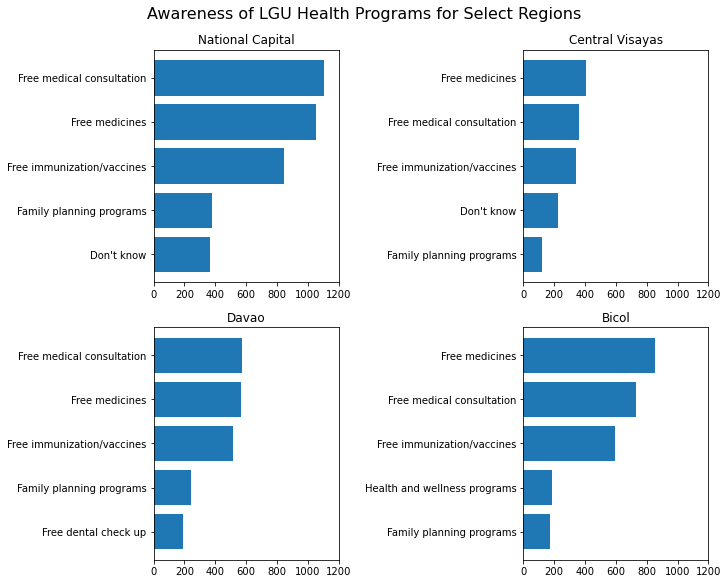

In [9]:
lgu_prog_ = lgu_prog_.sort_values(by = 'value')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),  constrained_layout=True)

ncr = lgu_prog_.loc["National Capital"]
cen_vis = lgu_prog_.loc["Central Visayas"]
dav = lgu_prog_.loc["Davao"]
bicol = lgu_prog_.loc["Bicol"]

axes[0,0].barh(ncr["program"], ncr["value"])
axes[0,0].set_title("National Capital")
axes[0,0].set_xlim(0,1200)
axes[0,1].barh(cen_vis["program"], cen_vis["value"])
axes[0,1].set_title("Central Visayas")
axes[0,1].set_xlim(0,1200)
axes[1,0].barh(dav["program"], dav["value"])
axes[1,0].set_title("Davao")
axes[1,0].set_xlim(0,1200)
axes[1,1].barh(bicol["program"], bicol["value"])
axes[1,1].set_title("Bicol")
axes[1,1].set_xlim(0,1200)


fig.suptitle('Awareness of LGU Health Programs for Select Regions', fontsize=16)
# plt.savefig("fig/Viz2.png",  bbox_inches='tight')
plt.show();